**This Project is about predicting whether a customer will change telecommunications provider, something known as "churning".**

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

- **"state**", string. 2-letter code of the US state of customer residence
- **"account_length"**, numerical. Number of months the customer has been with the current telco provider
- **"area_code"**, string="area_code_AAA" where AAA = 3 digit area code.
- **"international_plan"**, (yes/no). The customer has international plan.
- **"voice_mail_plan"**, (yes/no). The customer has voice mail plan.
- **"number_vmail_messages"**, numerical. Number of voice-mail messages.
- **"total_day_minutes"**, numerical. Total minutes of day calls.
- **"total_day_calls"**, numerical. Total minutes of day calls.
- **"total_day_charge"**, numerical. Total charge of day calls.
- **-"total_eve_minutes"**-, numerical. Total minutes of evening calls.
- **-"total_eve_calls"**-, numerical. Total number of evening calls.
- **-"total_eve_charge"**-, numerical. Total charge of evening calls.
- **-"total_night_minutes"**-, numerical. Total minutes of night calls.
- **-"total_night_calls"**-, numerical. Total number of night calls.
- **-"total_night_charge"**-, numerical. Total charge of night calls.
- **-"total_intl_minutes"**-, numerical. Total minutes of international calls.
- **-"total_intl_calls"**- numerical. Total number of international calls.
- **-"total_intl_charge"**-, numerical. Total charge of international calls
- **-"number_customer_service_calls"**-, numerical. Number of calls to customer service
- **-"churn"**-, (yes/no). Customer churn - target variable.

### Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
# importing the dataset  

df = pd.read_csv('./dataset/train.csv')
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [4]:
df.drop(columns=['account_length'] , axis=1 , inplace=True)

In [5]:
df['total_net_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_net_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_net_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']


df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0}) 
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 

df.drop(columns= ['state', 'area_code'], inplace= True)

In [6]:
df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                'total_day_calls','total_eve_calls', 'total_night_calls', 'total_day_minutes', 
                 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [7]:
df.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_net_minutes,total_net_calls,total_net_charge
0,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


In [8]:
corr = df.corr
corr

<bound method DataFrame.corr of       international_plan  voice_mail_plan  number_vmail_messages  \
0                      0                1                     26   
1                      0                0                      0   
2                      1                0                      0   
3                      1                0                      0   
4                      0                1                     24   
...                  ...              ...                    ...   
4245                   0                0                      0   
4246                   0                0                      0   
4247                   0                0                      0   
4248                   0                1                     40   
4249                   0                1                     34   

      total_intl_minutes  total_intl_calls  total_intl_charge  \
0                   13.7                 3               3.70   
1                   1

<AxesSubplot: >

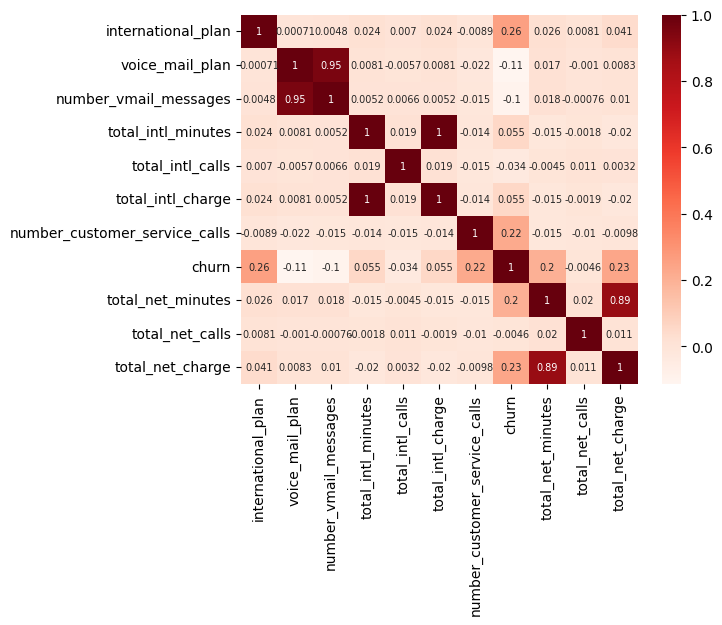

In [9]:

sns.heatmap(df.corr(), annot= True, cmap= 'Reds', annot_kws={'size': 7})

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop('churn' , axis=1 )
y = df['churn'] 
X_train , X_test , y_train , y_test = train_test_split(X , y  ,test_size = 0.20 , random_state = 42)

In [11]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape 

((3400, 10), (3400,), (850, 10), (850,))

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()

rfc_scores = []

for i in range(10):
    rfc.fit(X_train,y_train)  # this line will train the model
    y_pred = rfc.predict(X_test) # here we predict dementia group on testing dataset. y_pred has group values either 2(Non demented) or 1(demented) or 0 (converted)

    model_accuracy = accuracy_score(y_test,y_pred) # y_test is actual value of group. y_pred is the value that we predicted using our model. and we compare predicted values with actual values to calculate accuracy.
    
    rfc_scores.append(model_accuracy)

print('Accuracy of Random forest classifier = ',np.mean(rfc_scores))

Accuracy of Random forest classifier =  0.9755294117647058
